# 2. Simple Customization

In case we do not want to run the standard simulation, we can easily modify the initial conditions.

In [1]:
from tripod import Simulation

In [2]:
sim = Simulation()

The simulation object has an attribute to set the initial conditions `Simulation.ini`. The attribute is structured in initial conditions for dust, gas, the grid, and the central star. Upon calling `Simulation.initialize()`, the simulation object will be filled according to the parameters set here. We'll go through all options one by one.

**--> All quantities are in cgs units! <--**

In [3]:
sim.ini

namespace(dust=namespace(aIniMax=0.0001,
                         allowDriftingParticles=False,
                         d2gRatio=0.01,
                         distExp=-3.5,
                         rhoMonomer=1.67,
                         vFrag=100.0),
          gas=namespace(alpha=0.001,
                        Mdisk=9.942049353490256e+31,
                        mu=3.847030424486999e-24,
                        SigmaExp=-1.0,
                        SigmaRc=897587224200000.0),
          grid=namespace(mmin=1e-12,
                         Nr=100,
                         rmin=14959787070000.0,
                         rmax=1.495978707e+16),
          star=namespace(M=1.988409870698051e+33, R=139140000000.0, T=5772.0))

## Stellar parameters

The stellar parameters mainly influence the dynamical time scales and the temperature profile.

In [4]:
sim.ini.star

namespace(M=1.988409870698051e+33, R=139140000000.0, T=5772.0)

* M

Stellar mass, default: $1\ M_\odot$  
Has influence on the dynamical timescales in the disk.

* R

Stellar radius, default: $2\ M_\odot$  
Has influence on the temperature profile in the disk. The default temperature profile is a passively irradiated disk with a constant irradiation angle of 0.05.

* T

Effective temperature, default: 5772 K  
Has influence on the temperature profile in the disk. The default temperature profile is a passively irradiated disk with a constant irradiation angle of 0.05.

## Grid parameters

The grid parameters determine the shape of the radial grid. The mass grid is set up automatically in accordance with the two population approach of `TwoPopPy`. Specifically, the dust surface densities, their source terms, the midplane densities and the flux parameters have only length two in mass dimension. As dynamics between half of and the mass-averaged particle size enter into the calculations at numerous points, however, all other values depending on particle size have four entries in mass dimension. While we can set our own non-standard radial grid (see later), the mass grid should under no circumstances be meddled with.

In [5]:
sim.ini.grid

namespace(mmin=1e-12, Nr=100, rmin=14959787070000.0, rmax=1.495978707e+16)

* mmin 

Minimum particle mass, sets the minimum particle size, default $10^{-12}$ g   
Results in a minimal size of $5\times 10^{-5}$ cm for the default parameters

* Nr

Number of radial grid cells, default: 100

* rmin

Location of inner radial grid boundary, default 1 AU

* rmax

Location of outer radial grid boundary, default 1000 AU

## Gas Parameters

The gas parameters define the initial conditions of the gas disk. The standard surface density profile is the self-similar solution of [Lynden-Bell & Pringle (1974)](https://doi.org/10.1093/mnras/168.3.603).

In [6]:
sim.ini.gas

namespace(alpha=0.001,
          Mdisk=9.942049353490256e+31,
          mu=3.847030424486999e-24,
          SigmaExp=-1.0,
          SigmaRc=897587224200000.0)

* alpha

alpha viscosity parameter, default: $10^{-3}$  
see [Shakura & Sunyaev (1973)](http://adsabs.harvard.edu/abs/1973A%26A....24..337S) for details

* Mdisk

Inital gas disk mass, default: $0.05\ M_\odot$

* mu

Mean molecular weight of the gas, default: $2.3\ m_\mathrm{proton}$

* SigmaExp

Power law exponent of surface density profile, default: -1  
see [Lynden-Bell & Pringle (1974)](https://doi.org/10.1093/mnras/168.3.603)

* SigmaRc

Critical cut-off radius of surface density, default: 30 AU  
see [Lynden-Bell & Pringle (1974)](https://doi.org/10.1093/mnras/168.3.603)

## Dust Parameters

The dust parameters define the initial conditions of the dust disk and the basic collisional behavior of the dust particles.

In [7]:
sim.ini.dust

namespace(aIniMax=0.0001,
          allowDriftingParticles=False,
          d2gRatio=0.01,
          distExp=-3.5,
          rhoMonomer=1.67,
          vFrag=100.0)

* aIniMax

Initial maximum particle size $s_{max}$, default: 1 µm

* allowDriftingParticles

Flag that trucates the dust distribution in the outer disk if the inital size is larger than the drift limit to prevent surious waves in the inital stage

* d2gRatio

Initial dust-to-gas ratio, default: $10^{-2}$

* distExp

Inital size distribution of particles, default: -3.5   
The particles will initially have a size distribution of $n\left(a\right) \propto a^\mathrm{distExp}$ up to a maximum particle size of `Simulation.ini.dust.aIniMax`. The standard model uses the so-called MRN distribution of interstellar grains as initial condition. See [Mathis et al. (1977)](https://doi.org/10.1086/155591)..

* rhoMonomer

Monomer bulk mass density, default: 1.67 g/cm³  
In the standard model all particles will have a filling factor of unity and therefore share this bulk mass density.

* vFrag

Fragmentation velocity, default 1 m/s.  
Particle collisions with a collision velocity that exceeds the fragmentation velocity will result in a fragmenting collision. Either full fragmentation or cratering will ensue depending on the mass ratio of the collision partners. Collisions below the fragmentation velocity lead to sticking.

## Changing the Initial Conditions

In this example we want to run a simulation with a more massive disk mass. We can use the constants module of `TriPoD`.

In [8]:
from dustpy import constants as c

In [9]:
sim.ini.gas.Mdisk = 0.1 * c.M_sun

We can now initialize the simulation as described in the previous section.

In [10]:
sim.initialize()

## Changing the Snapshots

The standard model runs for 100,000 years and starts writing data files at 1,000 years with 10 files per time decade. In this example, we only want to run the simulation for 10,000 years with only 5 snapshots per decade. This can easily be set by modifying `Simulation.t.snapshots`.

In [11]:
import numpy as np

In [12]:
sim.t.snapshots = np.logspace(3, 4, num=6, base=10) * c.year

## Changing the Output Directory

By default, `TwoPopPy` will protect already existing data files. If we ran the simulation now, an error would be raised, because we have already existing data files in the output directory from the previous chapter.

We could either set `Simulation.writer.overwrite` to `True` to overwrite our existing data files or we could change the name of the output directory.

In [13]:
sim.writer.datadir = "2_data"

The simulation is now ready to go.

In [14]:
sim.run()


TriPoD v0.0.1

Creating data directory 2_data.
Writing file 2_data/data0000.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0001.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0002.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0003.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0004.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0005.hdf5
Writing dump file 2_data/frame.dmp
Execution time: 0:00:01


The simulation has now run for 10,000 years

In [15]:
sim.t / c.year

10000.0

and we can have a look at the current state.

In [16]:
from tripod import plot

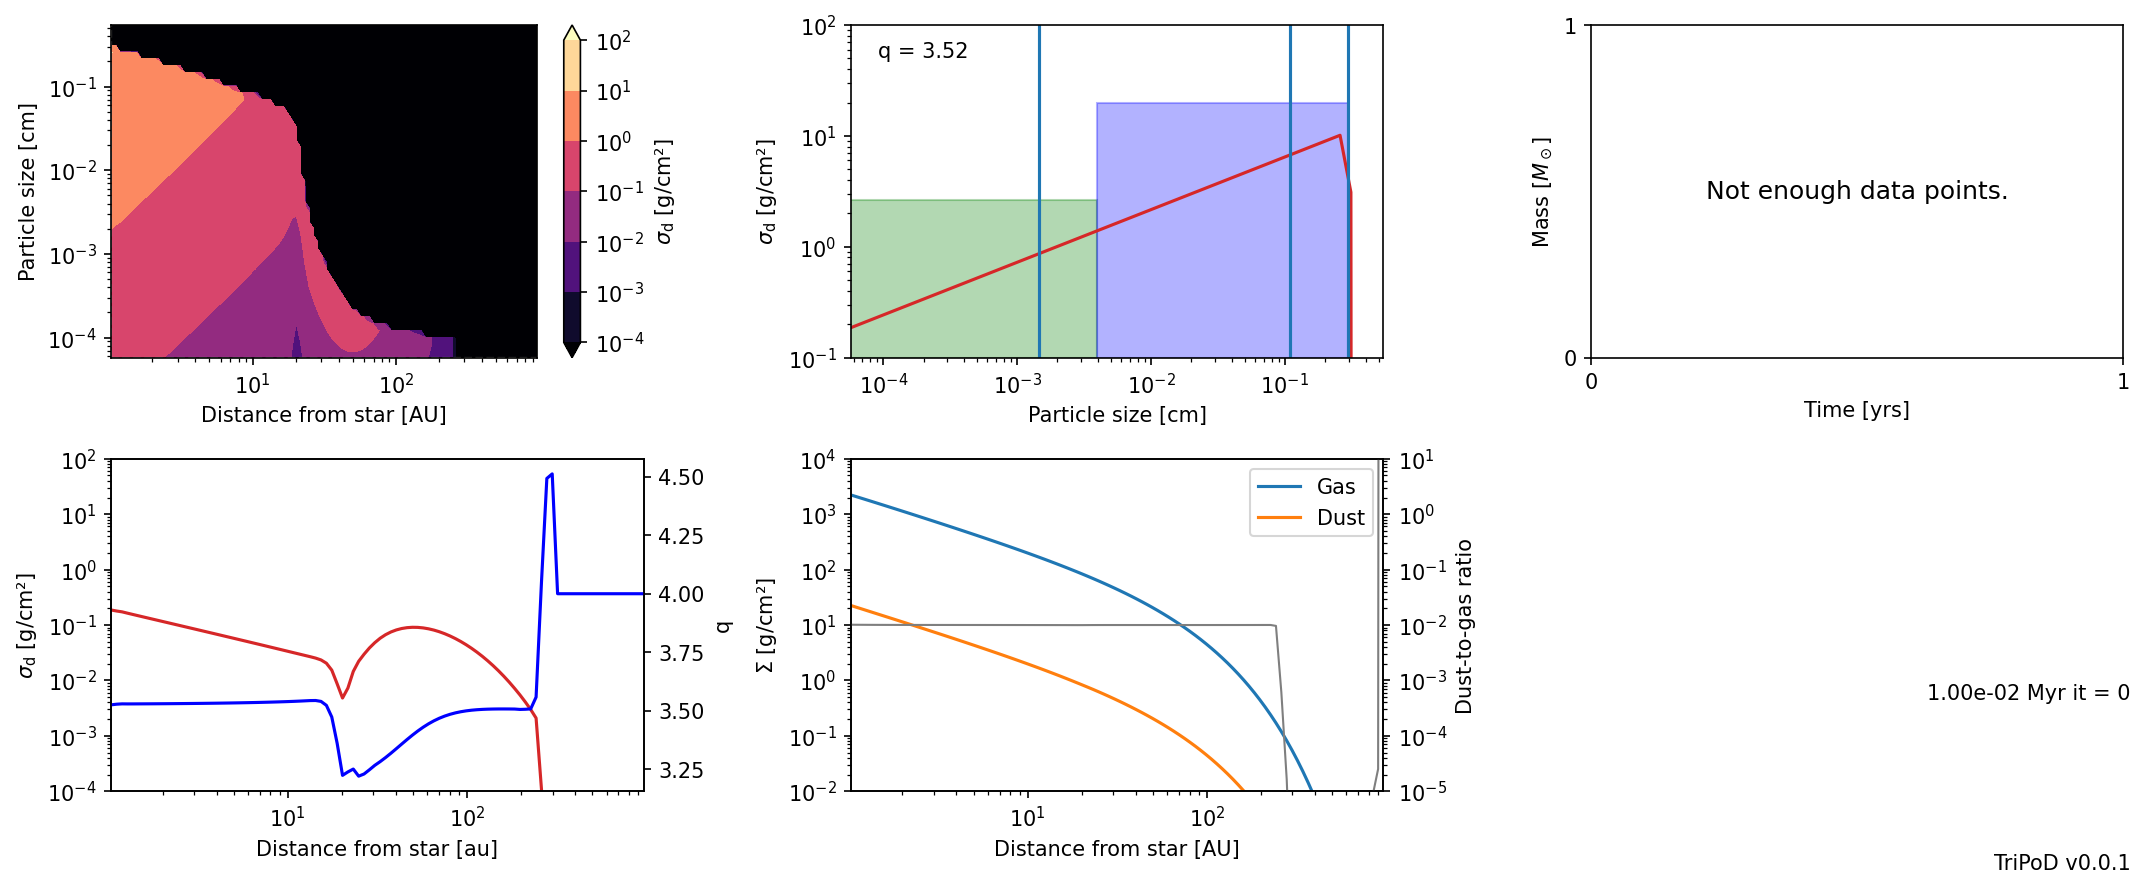

In [17]:
plot.panel(sim)